# Questions et infos

Configuration de train_model() et predict_image() dans ce notebook

* Il faut prendre quoi comme valeur d'epsilon par defaut ?
* train_model() prend maintenant en input: X, y, label_encoder + config.all_variables
* predict_image() prend maintenant en input un np.array
* Je ne trouve pas un model > 90% d'accuracy
* Dans la DB, les images ont 1 ou 3 channels ? (greyscale/RGB)
* J'ai ajouté une fonction resize_images à implementer dans train_model() car:
    * Taille des images variables pour chaque user
* Verifier le ML car:
    * Nombre d'images variable en fonction des users
* Je n'ai pas utilisé les variables de **config** pour faire des fonctions plus propre. Elle pourront être récupéré plus tard juste avant l'appel des fonctions
* Ajout de show_logs car le GUI n'a pas besoin de print





In [ ]:
import tensorflow as tf # run it first else you will have problems

In [16]:
# Aucune des variables ici n'est utilisé. Les valeurs ont été implementées en input des fonctions
# --- Chemins et Noms ---
ANONY_IMAGES_PATH = 'data/reconstructed_pipeline'
MODEL_SAVE_DIR = 'models/trained/'
LOG_DIR = 'models/logs/'
MODEL_NAME = 'simple_cnn_lfw_anony_v1'
# --- Paramètres des Données et Prétraitement ---
COLOR_MODE = 'grayscale'
IMG_WIDTH, IMG_HEIGHT, CHANNELS = (64, 64, 1 if COLOR_MODE == 'grayscale' else 3)
# --- Paramètres de Division des Données ---
SPLIT_STRATEGY = 'stratified'
# -- Pour 'stratified' --
TEST_SPLIT_RATIO = 0.2
VALIDATION_SPLIT_RATIO = 0.15
# -- Pour 'fixed_per_subject' --
N_TRAIN_PER_SUBJECT = 16
RANDOM_STATE = 42
# ---    Paramètres du Modèle ---
MODEL_ARCHITECTURE = 'simple_cnn'
# -- Pour Transfer Learning (si MODEL_ARCHITECTURE commence par 'transfer_') --
TRANSFER_BASE_MODEL_NAME = 'MobileNetV2'
TRANSFER_FREEZE_BASE = True
# --- Paramètres d'Entraînement ---
EPOCHS = 50
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EARLY_STOPPING_PATIENCE = 10

### Import dataset 2 (from folder)

In [2]:
import src.modules.data_loader as data_loader

X, y, label_encoder = data_loader.load_anonymized_images_flat(
        data_dir='data/reconstructed_pipeline',
        img_width=64,
        img_height=64,
        color_mode='grayscale'
    )

Chargement des images depuis : data/reconstructed_pipeline
Format attendu : 64x64, mode: grayscale
Erreur: Le dossier spécifié n'existe pas : data/reconstructed_pipeline


### Import dataset 1 (from db)

In [5]:
import numpy as np
import base64
from PIL import Image
import io
from database_controller import DatabaseController
from sklearn.preprocessing import LabelEncoder

def base64_to_numpy(b64_string):
    image_data = base64.b64decode(b64_string)
    image = Image.open(io.BytesIO(image_data)).convert("RGB") # RGB/L
    #image = np.expand_dims(np.array(image), axis=-1)
    # A verifier si c'est forcement du gray scale dans la bdd
    return np.array(image)

def prepare_data_from_dict(image_dict):
    X = []
    y = []
    for user_id, images in image_dict.items():
        for img in images:
            X.append(img)
            y.append(user_id)
    X = np.array(X)
    y = np.array(y)
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    return X, y_encoded, label_encoder

def resize_images(image_dict, target_size):
    resized_dict = {}
    for user_id, images in image_dict.items():
        resized_images = [np.array(Image.fromarray(img).resize(target_size)) for img in images]
        resized_dict[user_id] = np.array(resized_images)
    return resized_dict



db = DatabaseController(r"..\..\data\database.db")

result = db.get_table()
dic = {row[0]: np.array([base64_to_numpy(img)for img in row[1].split(',')]) for row in result}

input_shape = dic[1][0].shape
width, height, _ = input_shape

image_dict = resize_images(dic, (width, height))
X, y, label_encoder = prepare_data_from_dict(image_dict)

print(f"Number of images: {len(dic)}")
print(f"input_shape: {input_shape}")

Create db connection at: D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\data\database.db
Number of images: 15
input_shape: (100, 100, 3)


### Create model

Division des données : test_size=0.2, validation_size=0.15
Taille Test: 33 échantillons
Taille Entraînement: 107 échantillons
Taille Validation: 25 échantillons
Construction du modèle CNN simple avec input_shape=(100, 100, 3) et num_classes=15
Modèle CNN simple construit.



Epoch 1: val_accuracy improved from -inf to 0.08000, saving model to models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 2: val_accuracy did not improve from 0.08000

Epoch 3: val_accuracy improved from 0.08000 to 0.12000, saving model to models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 4: val_accuracy did not improve from 0.12000

Epoch 5: val_accuracy did not improve from 0.12000

Epoch 6: val_accuracy did not improve from 0.12000

Epoch 7: val_accuracy did not improve from 0.12000

Epoch 8: val_accuracy did not improve from 0.12000

Epoch 9: val_accuracy did not improve from 0.12000

Epoch 10: val_accuracy did not improve from 0.12000

Epoch 11: val_accuracy improved from 0.12000 to 0.16000, saving model to models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 12: val_accuracy improved from 0.16000 to 0.20000, saving model to models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 13: val_accuracy did not improve from 0.20000

Epoch 14: val_accuracy did not improve from 0.20000

Epoch 15: val_accuracy improved from 0.20000 to 0.28000, saving model to models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 16: val_accuracy improved from 0.28000 to 0.36000, saving model to models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 17: val_accuracy improved from 0.36000 to 0.40000, saving model to models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 18: val_accuracy improved from 0.40000 to 0.44000, saving model to models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 19: val_accuracy did not improve from 0.44000

Epoch 20: val_accuracy did not improve from 0.44000

Epoch 21: val_accuracy did not improve from 0.44000

Epoch 22: val_accuracy did not improve from 0.44000

Epoch 23: val_accuracy did not improve from 0.44000

Epoch 24: val_accuracy did not improve from 0.44000

Epoch 25: val_accuracy did not improve from 0.44000

Epoch 26: val_accuracy did not improve from 0.44000

Epoch 27: val_accuracy did not improve from 0.44000

Epoch 28: val_accuracy did not improve from 0.44000
Epoch 28: early stopping
Restoring model weights from the end of the best epoch: 18.
LabelEncoder sauvegardé dans : models/trained/simple_cnn_lfw_anony_v1_label_encoder.joblib
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6326 - loss: 1.8241


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000016F789E3BA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w

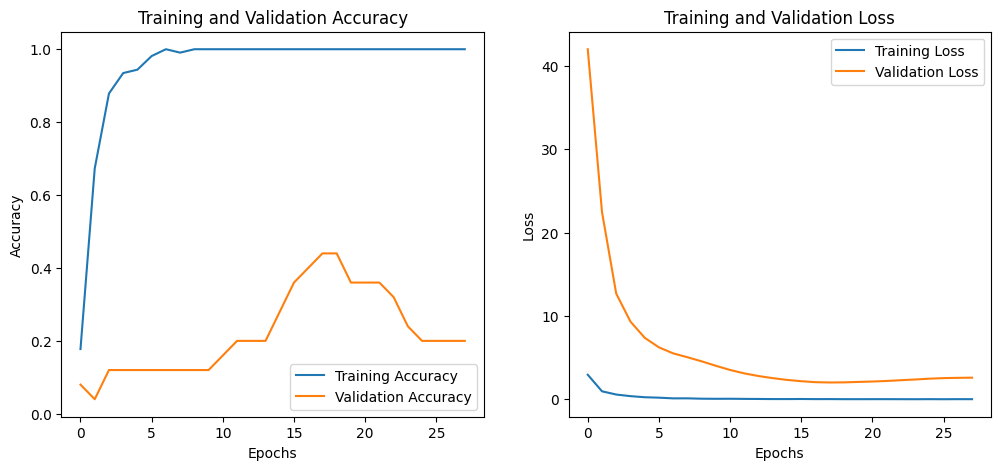

In [11]:
import os
import io
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import src.face_recognition.ml_models as ml_models



def draw_accuracy_and_loss_curves(epochs_range, acc, loss, val_acc=None, val_loss=None):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    if val_acc is not None:
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    if val_loss is not None:
        plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    return plt

# --- Fonction pour convertir du texte en image PIL ---
def text_to_pil_image(text, width=800, padding=10, font_size=14):
    font = ImageFont.load_default()
    lines = text.splitlines()
    height = (font_size + 4) * len(lines) + 2 * padding
    image = Image.new("RGB", (width, height), color="white")
    draw = ImageDraw.Draw(image)
    for i, line in enumerate(lines):
        draw.text((padding, padding + i * (font_size + 4)), line, fill="black", font=font)
    return image

def train_model(
    X, y, label_encoder,
    model_save_dir='models/trained/',
    log_dir='models/logs/',
    model_name='simple_cnn_lfw_anony_v1',
    input_shape=(100, 100, 1),
    split_strategy='stratified',
    test_split_ratio=0.2,
    validation_split_ratio=0.15,
    n_train_per_subject=7,
    random_state=42,
    learning_rate=0.001,
    batch_size=32,
    epochs=50,
    early_stopping_patience=10,
    transfer_base_model_name='MobileNetV2',
    transfer_freeze_base=True,
    model_architecture='simple_cnn',
    show_logs=False
    ):
    """
    Orchestre le processus complet d'entraînement du modèle de reconnaissance faciale.

    --- List d'images et de labels
    :param X: ...
    :param y: ...
    :param label_encoder: ...

    --- Chemins et Noms ---
    :param model_save_dir: Dossier pour sauvegarder les modèles entraînés, l'encodeur de labels, etc.
    :param log_dir: Dossier pour les logs TensorBoard (optionnel, laisser vide ou None pour désactiver)
    :param model_name: # Nom de base pour les fichiers sauvegardés (modèle, logs, courbes)

    --- Paramètres des Données et Prétraitement ---
    :param input_shape: (Largeur, Hauteur canaux) cible des images. IMPORTANT: 'rgb' (3 canaux) est souvent requis pour les modèles de transfert pré-entraînés. 'grayscale' est plus simple et peut suffire pour un CNN simple.

    --- Paramètres de Division des Données ---
    :param split_strategy: Stratégie de division: 'stratified' ou 'fixed_per_subject'

    --- Pour 'stratified' ---
    :param test_split_ratio: Proportion du dataset total à utiliser pour l'ensemble de test
    :param validation_split_ratio: Proportion du dataset total à utiliser pour l'ensemble de validation Sera déduite de l'ensemble d'entraînement si non nulle.

    --- Pour 'fixed_per_subject' ---
    :param n_train_per_subject: Nombre exact d'images par sujet pour l'ensemble d'entraînement. (Ignoré si SPLIT_STRATEGY n'est pas 'fixed_per_subject')
    :param random_state: Seed pour la reproductibilité des divisions et initialisations

    --- Paramètres d'Entraînement ---
    :param learning_rate: Taux d'apprentissage pour l'optimiseur Adam
    :param batch_size: Taille du lot (batch size)
    :param epochs: Nombre maximal d'époques d'entraînement
    :param early_stopping_patience: Patience pour l'EarlyStopping (nombre d'époques sans amélioration sur val_accuracy avant d'arrêter). Mettre à 0 ou une valeur négative pour désactiver l'EarlyStopping.

    --- Pour Transfer Learning (si MODEL_ARCHITECTURE commence par 'transfer_') ---
    :param transfer_base_model_name: Nom du modèle de base à charger depuis tf.keras.applications
    :param transfer_freeze_base: Faut-il geler les poids du modèle de base lors du premier entraînement ? Mettre à False pour du fine-tuning (nécessite souvent un LEARNING_RATE plus bas).

    :param model_architecture: Choix de l'architecture dans ml_models.py: 'simple_cnn', 'transfer_MobileNetV2', 'transfer_ResNet50', etc.

    :return:
    """
    # --- --------------------------------- ---
    # --- 1. Chargement de la Configuration ---
    # --- --------------------------------- ---
    # Start timer

    if show_logs: print("--- Démarrage du Script d'Entraînement ---")
    start_time = time.time()

    # Display model parameters
    if show_logs:
        print("Configuration personnalisée chargée :")
        print(f"  - Architecture Modèle: {model_architecture}")
        print(f"  - Nom Modèle: {model_name}")
        print(f"  - Dimensions Image: {input_shape}")
        print(f"  - Stratégie Split: {split_strategy}")
        print(f"  - Époques: {epochs}, Batch Size: {batch_size}")

    # Prepare output & log folder
    os.makedirs(model_save_dir, exist_ok=True)
    if log_dir:
        os.makedirs(log_dir, exist_ok=True)
        if show_logs: print(f"  - Dossier Logs TensorBoard: {log_dir}")

    # --- -------------------------- ---
    # --- 2. Préparation des Données ---
    # --- -------------------------- ---
    if show_logs: print("\n--- Préparation des données depuis dictionnaire ---")

    num_classes = len(label_encoder.classes_)
    if show_logs: print(f"Nombre de classes détectées : {num_classes}")

    # --- ----------------------- ---
    # --- 3. Division des Données ---
    # --- ----------------------- ---
    if show_logs: print("\n--- Division des données ---")
    X_train, y_train = None, None
    X_val, y_val = None, None
    X_test, y_test = None, None

    if split_strategy == 'stratified':
        data_splits = data_loader.split_data_stratified(
            X, y, # TODO BRUCE: data_loader.split_data_stratified()
            test_size=test_split_ratio,
            validation_size=validation_split_ratio,
            random_state=random_state
        )
        X_train = data_splits.get('X_train')
        y_train = data_splits.get('y_train')
        X_val = data_splits.get('X_val')
        y_val = data_splits.get('y_val')
        X_test = data_splits.get('X_test')
        y_test = data_splits.get('y_test')

        if X_val is None and validation_split_ratio > 0 and X_train is not None and len(X_train) > 0:
            val_ratio_from_train = validation_split_ratio / (1.0 - test_split_ratio)
            if val_ratio_from_train < 1.0:
                if show_logs: print(f"Création du set de validation depuis l'entraînement (ratio: {val_ratio_from_train:.2f})")
                X_train, X_val, y_train, y_val = train_test_split(
                    X_train, y_train,
                    test_size=val_ratio_from_train,
                    random_state=random_state,
                    stratify=y_train
                )
            else:
                print("Attention: Ratios de split incohérents, pas de données d'entraînement restantes après validation.")
    elif split_strategy == 'fixed_per_subject':
        X_train_full, X_test, y_train_full, y_test = data_loader.split_data_fixed_per_subject(
            X, y,
            n_train_per_class=n_train_per_subject,
            random_state=random_state
        )
        if validation_split_ratio > 0 and X_train_full is not None and len(X_train_full) > 0:
            if show_logs: print(f"Création du set de validation depuis l'entraînement (ratio: {validation_split_ratio})")
            X_train, X_val, y_train, y_val = train_test_split(
                X_train_full, y_train_full,
                test_size=validation_split_ratio,
                random_state=random_state,
                stratify=y_train_full
            )
        else:
            X_train, y_train = X_train_full, y_train_full
            X_val, y_val = None, None
    else:
        print(f"Erreur: Stratégie de split '{split_strategy}' non reconnue.")
        return

    if X_train is None or len(X_train) == 0:
        print("Erreur: Aucune donnée d'entraînement disponible après la division.")
        return
    if X_val is None or len(X_val) == 0:
        print("Attention: Aucune donnée de validation disponible. L'entraînement se fera sans suivi de validation.")
        validation_data = None # `fit` utilisera pas de validation
    else:
        validation_data = (X_val, y_val)
        if show_logs: print(f"Taille finale - Entraînement: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test) if X_test is not None else 0}")

    # --- ------------------------- ---
    # --- 4. Construction du Modèle ---
    # --- ------------------------- ---
    if show_logs: print("\n--- Construction du modèle ---")
    model = None
    if model_architecture == 'simple_cnn':
        model = ml_models.build_simple_cnn(input_shape=input_shape, num_classes=num_classes)
    elif model_architecture.startswith('transfer_'):
        if show_logs: print(f"Utilisation du modèle de base: {transfer_base_model_name}, Freeze: {transfer_freeze_base}")
        model = ml_models.build_transfer_model(
            input_shape=input_shape,
            num_classes=num_classes,
            base_model_name=transfer_base_model_name,
            freeze_base=transfer_freeze_base)
    else:
        print(f"Erreur: Architecture de modèle non reconnue: {model_architecture}")
        return

    # --- ------------------------ ---
    # --- 5. Compilation du Modèle ---
    # --- ------------------------ ---
    if show_logs: print("\n--- Compilation du modèle ---")
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    if show_logs:
        print("Modèle compilé avec Adam optimizer.")
        model.summary()

    # Capture model summary
    summary_io = io.StringIO()
    model.summary(print_fn=lambda x: summary_io.write(x + "\n"))
    summary_text = summary_io.getvalue()
    #summary_image = text_to_pil_image(summary_text)

    # --- ------------------------------ ---
    # --- 6. Configuration des Callbacks ---
    # --- ------------------------------ ---
    if show_logs: print("\n--- Configuration des Callbacks ---")
    callbacks = []

    model_filename = f"{model_name}.h5"
    model_filepath = os.path.join(model_save_dir, model_filename)
    if show_logs: print(f"  - ModelCheckpoint: Sauvegarde du meilleur modèle dans {model_filepath}")
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=model_filepath,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
    callbacks.append(checkpoint_callback)

    if early_stopping_patience > 0:
        if show_logs: print(f"  - EarlyStopping: Activé avec patience={early_stopping_patience}")
        early_stopping_callback = tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=early_stopping_patience,
            mode='max',
            restore_best_weights=True,
            verbose=1
        )
        callbacks.append(early_stopping_callback)
    else:
        if show_logs: print("  - EarlyStopping: Désactivé.")

    if log_dir:
        tensorboard_log_dir = os.path.join(log_dir, model_name + "_" + time.strftime("%Y%m%d-%H%M%S"))
        if show_logs: print(f"  - TensorBoard: Logs dans {tensorboard_log_dir}")
        tensorboard_callback = tf.keras.callbacks.TensorBoard(
            log_dir=tensorboard_log_dir,
            histogram_freq=1
        )
        callbacks.append(tensorboard_callback)
    else:
        if show_logs: print("  - TensorBoard: Désactivé.")

    csv_log_path = os.path.join(model_save_dir, f"{model_name}_training_log.csv")
    if show_logs: print(f"  - CSVLogger: Logs dans {csv_log_path}")
    csv_logger_callback = tf.keras.callbacks.CSVLogger(csv_log_path, append=False)
    callbacks.append(csv_logger_callback)

    # --- ------------------------- ---
    # --- 7. Entraînement du Modèle ---
    # --- ------------------------- ---
    if show_logs: print("\n--- Démarrage de l'entraînement ---")
    try:
        history = model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=validation_data,
            callbacks=callbacks,
            verbose=0
        )
        if show_logs: print("--- Entraînement terminé ---")
    except Exception as e:
        print(f"\nErreur pendant l'entraînement : {e}")
        encoder_save_path = os.path.join(model_save_dir, f"{model_name}_label_encoder.joblib")
        print("\nSauvegarde de l'encodeur de labels (même si l'entraînement a échoué)...")
        data_loader.save_label_encoder(label_encoder, encoder_save_path)
        return

    # --- -------------------- ---
    # --- 8. Post-Entraînement ---
    # --- -------------------- ---
    encoder_save_path = os.path.join(model_save_dir, f"{model_name}_label_encoder.joblib")
    if show_logs: print("\n--- Sauvegarde de l'encodeur de labels ---")
    data_loader.save_label_encoder(label_encoder, encoder_save_path)

    # Evaluation
    eval_loss, eval_acc = model.evaluate(X_test, y_test)
    y_pred = np.argmax(model.predict(X_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    if history is not None:
        if show_logs: print("\n--- Affichage des courbes d'apprentissage ---")
        try:
            acc = history.history['accuracy']
            loss = history.history['loss']
            val_acc = history.history['val_accuracy'] if validation_data else None
            val_loss = history.history['val_loss'] if validation_data else None
            epochs_range = range(len(acc))

            plt_obj = draw_accuracy_and_loss_curves(epochs_range, acc, loss, val_acc, val_loss)
            buf = io.BytesIO()
            plt_obj.savefig(buf, format='png')
            buf.seek(0)
            image_pil = Image.open(buf)

            plot_save_path = os.path.join(model_save_dir, f"{model_name}_training_curves.pdf")
            plt.savefig(plot_save_path, format='pdf', bbox_inches='tight')
            if show_logs: print(f"Courbes sauvegardées dans : {plot_save_path}")
        except Exception as plot_e:
            print(f"Erreur lors de la génération/sauvegarde des courbes: {plot_e}")

    end_time = time.time()
    duration = end_time - start_time
    if show_logs:
        print(f"\n--- Script d'Entraînement Terminé en {duration:.2f} secondes ---")
        print(f"Le meilleur modèle devrait être sauvegardé dans : {model_filepath}")
        print(f"L'encodeur de labels est sauvegardé dans : {encoder_save_path}")

    return {
        "duration": duration,
        "model": model,
        "summary_text": summary_text,
        "training_plot": image_pil,
        "confusion_matrix": cm,
        "classification_report": report,
        "evaluation": {
            "loss": eval_loss,
            "accuracy": eval_acc
        }
    }




# split_strategy= stratified/fixed_per_subject
# model_architecture= simple_cnn/transfer_
    # transfer_base_model_name= MobileNetV2/ResNet50/EfficientNetB0
    # transfer_freeze_base= True/False
momo = train_model(
          X, y, label_encoder,
          input_shape=input_shape,
         # split_strategy='stratified',
         # model_architecture='simple_cnn',
         # transfer_base_model_name="EfficientNetB0",
         # transfer_freeze_base=False
          )

In [7]:
# Display output method
"""
    "duration"
    "summary_text"
    "training_plot"
    "confusion_matrix"
    "classification_report"
    "evaluation": {"loss", "accuracy"}
"""
summary_image = text_to_pil_image(momo['summary_text'])
momo['evaluation']

{'loss': 1.5883125066757202, 'accuracy': 0.4848484992980957}

### Predict

In [13]:
# data input
user, num_img = 3, 4
img_to_predict = dic[user][num_img]
img_to_predict.shape

from typing import Optional

# --- Fonction de Prétraitement pour une image unique ---
def preprocess_single_image(
    image_path: str,
    img_width: int,
    img_height: int,
    color_mode: str
) -> Optional[np.ndarray]:
    """
    Charge, redimensionne, normalise et formate une image unique pour la prédiction.
    """
    try:
        img = Image.open(image_path)

        pil_mode = 'L' if color_mode == 'grayscale' else 'RGB'
        img_converted = img.convert(pil_mode)

        img_resized = img_converted.resize((img_width, img_height))

        img_array = np.array(img_resized)

        img_normalized = img_array.astype('float32') / 255.0

        if color_mode == 'grayscale':
            img_final = np.expand_dims(img_normalized, axis=-1)
        else:
            img_final = img_normalized

        img_batch = np.expand_dims(img_final, axis=0)

        print(f"Image prétraitée, shape final: {img_batch.shape}")
        return img_batch

    except FileNotFoundError:
        print(f"Erreur: Fichier image introuvable : {image_path}")
        return None
    except Exception as e:
        print(f"Erreur lors du prétraitement de l'image {image_path}: {e}")
        return None


# --- Fonction Principale de Prédiction ---
def predict_image(image_array: np.ndarray,
                        model_save_dir: str = 'models/trained/',
                        model_name: str = 'simple_cnn_lfw_anony_v1',
                        input_shape: tuple = (100, 100, 1),
                        show_logs = False,
                        ):
    """
    Charge le modèle et l'encodeur, prédit l'identité pour une image.

    :param image_array: Image unique sous forme de tableau NumPy
    :param model_save_dir: Répertoire contenant le modèle et l'encodeur
    :param model_name: Nom de base du modèle
    :param input_shape: Tuple (H, W, C) représentant la taille attendue

    :return: label prédit (str)
    """
    if show_logs: print("--- Démarrage du Script de Prédiction ---")
    start_time = time.time()

    # --- 1. Charger Configuration et Chemins ---
    model_filepath = os.path.join(model_save_dir, f"{model_name}.h5")
    encoder_filepath = os.path.join(model_save_dir, f"{model_name}_label_encoder.joblib")

    if show_logs:
        print(f"  - Modèle utilisé: {model_filepath}")
        print(f"  - Encodeur utilisé: {encoder_filepath}")
        print(f"  - Image à prédire: tableau NumPy, shape={image_array.shape}")

    # --- 2. Charger Modèle et Encodeur ---
    if not os.path.exists(model_filepath):
        raise FileNotFoundError(f"Modèle introuvable: {model_filepath}")
    model = tf.keras.models.load_model(model_filepath)

    label_encoder = data_loader.load_label_encoder(encoder_filepath)
    if label_encoder is None:
        raise ValueError("Erreur: Encodeur de labels introuvable ou invalide")

    # --- 3. Prétraitement de l’image ---
    width, height, _ = input_shape
    image_array = np.array(Image.fromarray(image_array).resize((width, height)))

    if image_array.ndim == 3:
        image_array = np.expand_dims(image_array, axis=0)  # (1, H, W, C)
    image_array = image_array.astype("float32") / 255.0

    # --- 4. Prédiction ---
    prediction_probabilities = model.predict(image_array)
    predicted_index = np.argmax(prediction_probabilities[0])
    prediction_confidence = prediction_probabilities[0][predicted_index]
    predicted_label = label_encoder.inverse_transform([predicted_index])[0]

    if show_logs:
        print("\n--- Résultat de la Prédiction ---")
        print(f"  - Identité Prédite : {predicted_label}")
        print(f"  - Confiance : {prediction_confidence:.4f} ({prediction_confidence*100:.2f}%)")

        print(f"--- Script terminé en {time.time() - start_time:.2f} secondes ---")

    return predicted_label


prediction = predict_image(img_to_predict)
print(f"prediction: {prediction}")

LabelEncoder chargé depuis : models/trained/simple_cnn_lfw_anony_v1_label_encoder.joblib
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
prediction: 7
